<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da22_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json  # 파이썬의 기본 모듈 중 하나 - json 읽기/쓰기 기능

**JSON**

*   JSON(JavaScript Object Notation): 자바스크립트 객체 표현법
*   `{key1: value1, key2: value2, ...}` 같은 형식의 문자열
*   파이썬의 dict 클래스 타입과 비슷
*   json 모듈: JSON 형식 문자열 <---> dict 타입 객체


In [2]:
# json.dumps(obj): 파이썬 객체(obj)를 JSON 형식의 문자열로 변환해서 리턴 - Serialize(직렬화)
person = {'name': '홍길동', 'age': 16, 'height': 195.5}
person  #> dict 클래스의 __repr__() 메서드가 리턴하는 문자열이 콘솔에 출력.

{'age': 16, 'height': 195.5, 'name': '홍길동'}

In [3]:
type(person)  #> 파이썬 dict 클래스 타입의 객체

dict

In [4]:
person_json = json.dumps(person)
person_json  #> json.dumps() 함수가 리턴해준 문자열을 콘솔에 출력

'{"name": "\\ud64d\\uae38\\ub3d9", "age": 16, "height": 195.5}'

In [5]:
# json.loads(s): JSON 형식의 문자열 s를 파이썬 객체로 변환해서 리턴 - Deserialize(역직렬화)
result = json.loads(person_json)
result

{'age': 16, 'height': 195.5, 'name': '홍길동'}

In [6]:
type(result)

dict


*   `json.dump(obj, fp)`: 파이썬 객체 obj를 JSON 형식의 문자열로 변환(serialize)해서 파일 fp에 write
*   `json.load(fp)`: 파일 fp에서 문자열(JSON 형식)을 읽어서 파이썬 객체로 변환(deserialze)해서 리턴.
*   `json.dumps(obj)`: 파이썬 객체 obj를 JSON 형식의 문자열로 변환(serialize)해서 리턴.
*   `json.loads(s)`: 문자열 s(JSON 형식)를 파이썬 객체로 변환(deserialize)해서 리턴.


In [7]:
with open('person.json', mode='w') as f:  # 파일을 쓰기 모드로 오픈
    f.write(person_json)  # 파일에 문자열을 씀

In [9]:
with open('person.json', mode='r') as f:  # 파일을 읽기 모드로 오픈
    line = f.readline()  # 파일의 첫번째 줄을 읽음.
    print(line)
    obj = json.loads(line)  # 읽은 문자열을 파이썬 객체로 변환
    print(obj)

{"name": "\ud64d\uae38\ub3d9", "age": 16, "height": 195.5}
{'name': '홍길동', 'age': 16, 'height': 195.5}


In [12]:
with open('movie.json', mode='w') as f:
    # Python dict 객체
    m1 = {'mid': 1, 'title': '미나리', 'genre': 'Drama'}
    m2 = {'mid': 2, 'title': '승리호', 'genre': 'SF'}
    m3 = {'mid': 3, 'title': '인턴'}
    # JSON 형식의 문자열
    m1_s = json.dumps(m1)
    m2_s = json.dumps(m2)
    m3_s = json.dumps(m3)
    # 파일에 쓰기
    f.write(m1_s + '\n')
    f.write(m2_s + '\n')
    f.write(m3_s + '\n')

In [14]:
with open('movie.json', mode='r') as f:
    data = []  # 파일에서 읽은 내용을 저장할 리스트
    for line in f:  # 파일에서 한 줄씩 읽으면서
        obj = json.loads(line)  # 문자열을 파이썬 객체로 변환(deseialize)
        print(obj)
        data.append(obj)  # 리스트에 추가
    # data = [json.loads(line) for line in f]

{'mid': 1, 'title': '미나리', 'genre': 'Drama'}
{'mid': 2, 'title': '승리호', 'genre': 'SF'}
{'mid': 3, 'title': '인턴'}


In [15]:
data

[{'genre': 'Drama', 'mid': 1, 'title': '미나리'},
 {'genre': 'SF', 'mid': 2, 'title': '승리호'},
 {'mid': 3, 'title': '인턴'}]

In [16]:
df = pd.DataFrame(data)
df

,mid,title,genre
0,1,미나리,Drama
1,2,승리호,SF
2,3,인턴,NaN




---




*   https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/bitly_usagov/example.txt 파일을 다운로드
*   다운로드한 파일을 Colab 세션 저장소에 업로드
*   파일을 읽기 모드로 오픈
*   파일에서 첫번째 줄부터 마지막 줄까지 한 줄씩 읽으면서
*   읽은 문자열을 파이썬 dict 객체로 변환하고 리스트에 추가(append)


In [18]:
with open('example.txt', mode='r') as f:
    records = [json.loads(line) for line in f]
    print(len(records))

3560


In [19]:
df = pd.DataFrame(records)
df.head()
#> usa.gov 사이트를 접속한 클라이언트에 대한 정보들을 가지고 있는 파일

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [20]:
df.tail()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN
3559,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,0.0,America/New_York,VA,qxKrTK,qxKrTK,bitly,en-US,1.usa.gov,http://t.co/OEEEvwjU,http://herndon-va.gov/Content/public_safety/Pu...,1.331927e+09,1.312898e+09,Mc Lean,"[38.935799, -77.162102]",NaN,NaN


In [21]:
df.info()
#> json 파일(비정형, 반정형 데이터)을 데이터 프레임으로 변환하게 되면 보통 NA들이 많이 생기게 됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

*   tz 컬럼에는 몇 개의 시간대(timezon)가 있을까?
*   가장 많이 접속한 지역?

In [22]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [23]:
# tz 컬럼의 unique한 값들의 빈도수
df['tz'].value_counts()
#> value_counts() 메서드는 NA의 개수를 세지 않음!

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
America/Argentina/Mendoza            1
Asia/Manila                          1
Africa/Lusaka                        1
Asia/Kuching                         1
America/Argentina/Buenos_Aires       1
Name: tz, Length: 97, dtype: int64

In [24]:
df['tz'].value_counts().iloc[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [45]:
# NA의 개수도 표기
df_clean = df.copy()
df_clean['tz'] = df_clean['tz'].fillna('Missing')  # NA(값이 없음)를 'Missing' 문자열로 대체

In [46]:
df_clean['tz'].value_counts().head(n=10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [53]:
df_clean['tz'] = np.where(df_clean['tz'] == '', 'Unknown', df_clean['tz'])
# tz 컬럼의 값이 ''(empty string)이면 'Unknown'으로 대체하고, 그렇지 않으면 원래 값 그대로 사용.
s = df_clean['tz'].value_counts().head(n=10)
s

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

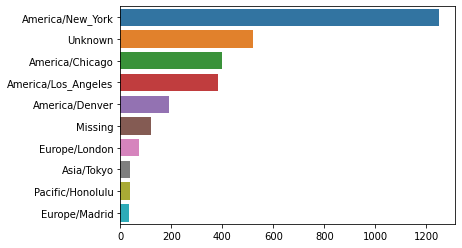

In [54]:
sns.barplot(x=s.values, y=s.index)
plt.show()

In [50]:
df_clean['tz'].value_counts().tail(n=10)

Africa/Casablanca                 1
America/Mazatlan                  1
America/Tegucigalpa               1
America/Argentina/Buenos_Aires    1
Europe/Ljubljana                  1
Africa/Lusaka                     1
Africa/Johannesburg               1
America/St_Kitts                  1
America/Lima                      1
America/Montevideo                1
Name: tz, dtype: int64

In [58]:
# 접속 시간대(timezone)에 한국 서울 시간대(Asia/Seoul)이 있을까요?
df_clean[df_clean['tz'].str.contains('Seoul')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
1428,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,KR,1.0,Asia/Seoul,11,y7mqmw,w41aUb,rebroth,"en-US,en;q=0.8",1.usa.gov,http://t.co/l16apDbA,http://apod.nasa.gov/apod/ap120314.html,1.331925e+09,1.331739e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3154,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,0.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3175,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,1.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3496,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,https://twitter.com/whitehouse/status/18067782...,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3506,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,direct,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
